In [13]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tensorflow.keras.preprocessing import image
from io import BytesIO


In [14]:
# Load the model
model_path = "./food_classification_model.h5"
model = tf.keras.models.load_model(model_path)

In [15]:
# Define the classes
classes = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']

In [18]:
upload_widget = widgets.FileUpload(accept="image/*", multiple=False)
display(upload_widget)

FileUpload(value=(), accept='image/*', description='Upload')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


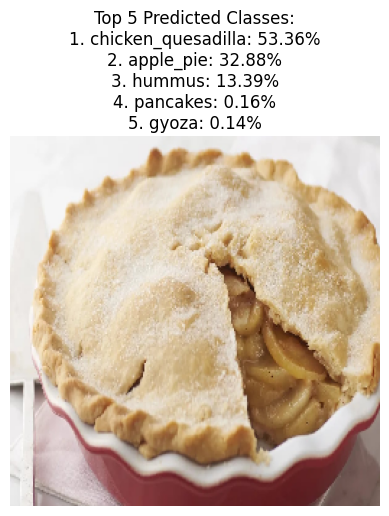

In [40]:
# Function to process and predict the uploaded image
def process_uploaded_image(upload_widget):
    # Check if the user has uploaded an image
    if upload_widget.value:
        # Get the uploaded image data
        uploaded_file = list(upload_widget.value)[0]  # Get the first (and only) file
        image_data = uploaded_file['content']  # Extract the image content
        
        # Convert the image data into a BytesIO object for reading
        image_stream = BytesIO(image_data)  # Convert memoryview to BytesIO
        
        # Convert the image stream into a PIL image
        img = image.load_img(image_stream, target_size=(256, 256))  # Resize image to the model's input size
        img_array = image.img_to_array(img)  # Convert image to array
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
        # Make the prediction
        predictions = model.predict(img_array)
        predicted_class = classes[np.argmax(predictions)]  # Get the index of the highest probability class
        confidence = predictions[0][np.argmax(predictions[0])]
        
        # Identify the top 5 predicted classes and their confidence scores
        top_5_indices = np.argsort(predictions[0])[::-1][:5]
        top_5_classes = [classes[i] for i in top_5_indices]
        top_5_probabilities = predictions[0][top_5_indices]
        
        # Display the image and the prediction
        plt.imshow(img)
        if confidence < 0.8:
            plt.title(f'Top 5 Predicted Classes:\n1. {top_5_classes[0]}: {top_5_probabilities[0]*100:.2f}%\n'
                      f'2. {top_5_classes[1]}: {top_5_probabilities[1]*100:.2f}%\n'
                      f'3. {top_5_classes[2]}: {top_5_probabilities[2]*100:.2f}%\n'
                      f'4. {top_5_classes[3]}: {top_5_probabilities[3]*100:.2f}%\n'
                      f'5. {top_5_classes[4]}: {top_5_probabilities[4]*100:.2f}%')
        else:
            plt.title(f'Predicted Class: {predicted_class} \n Confidence: {confidence*100:.2f}%')
        plt.axis('off')
        plt.show()
        
        return predicted_class if confidence >= 0.8 else top_5_classes
    else:
        print("No image uploaded yet.")

# Wait for the user to upload the image and then process it
predicted_class = process_uploaded_image(upload_widget)

In [41]:
print(predicted_class)

['chicken_quesadilla', 'apple_pie', 'hummus', 'pancakes', 'gyoza']


In [42]:
from openai import OpenAI
from dotenv import load_dotenv
from IPython.display import display, Markdown
load_dotenv()

client = OpenAI()
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant that recieves the name of the food and return the common allergies that it may contain. Be concise.",
    },
]

messages.append({"role": "user", "content": f"{predicted_class}"})
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
)

display(Markdown(completion.choices[0].message.content))

- **Chicken Quesadilla**: Dairy, Gluten, Chicken
- **Apple Pie**: Gluten, Dairy
- **Hummus**: Sesame (Tahini), Chickpeas
- **Pancakes**: Gluten, Dairy, Eggs
- **Gyoza**: Gluten, Soy, Shellfish (if containing shrimp)